In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import boxcox

%matplotlib inline

## Accessing the datasets

In [246]:
benin = pd.read_csv("benin-malanville.csv")
sierra = pd.read_csv("sierraleone-bumbuna.csv")
togo = pd.read_csv("togo-dapaong_qc.csv")

In [4]:
benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
sierra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
togo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [29]:
benin.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


## Task 1 Summary Statistics

In [58]:
def summary_statistice(df):
    df_column = df.iloc[:,1:19].columns.tolist()
    df_min = df.iloc[:,1:19].min().tolist()
    df_list = list(zip(df_column,df_min))
    print(f"Minimum:\n {df_list}")
    
    print('\n')
    
    df_column = df.iloc[:,1:19].columns.tolist()
    df_max = df.iloc[:,1:19].max().tolist()
    df_list = list(zip(df_column,df_max))
    print(f"Maximum:\n {df_list}")
    
    print('\n')
    
    df_column = df.iloc[:,1:19].columns.tolist()
    df_mean = df.iloc[:,1:19].mean().round(2).tolist()
    df_list = list(zip(df_column,df_mean))
    print(f"Mean:\n {df_list}")
    
    print('\n')
    
    df_column = df.iloc[:,1:19].columns.tolist()
    df_median = df.iloc[:,1:19].median().tolist()
    df_list = list(zip(df_column,df_median))
    print(f"Median:\n {df_list}")
    
    print('\n')
    
    df_column = df.iloc[:,1:19].columns.tolist()
    df_std = df.iloc[:,1:19].std().round(2).tolist()
    df_list = list(zip(df_column,df_std))
    print(f"Standard deviation:\n {df_list}")
    
    print('\n')
    
    df_column = df.iloc[:,1:19].columns.tolist()
    df_25th = df.iloc[:,1:19].quantile(0.25).tolist()
    df_list = list(zip(df_column,df_25th))
    print(f"25th Percentile:\n {df_list}")
    
    print('\n')
    
    df_column = df.iloc[:,1:19].columns.tolist()
    df_50th = df.iloc[:,1:19].quantile(0.5).tolist()
    df_list = list(zip(df_column,df_50th))
    print(f"50th Percentile:\n {df_list}")
    
    print('\n')
    
    df_column = df.iloc[:,1:19].columns.tolist()
    df_75th = df.iloc[:,1:19].quantile(0.75).tolist()
    df_list = list(zip(df_column,df_75th))
    print(f"75th Percentile:\n {df_list}")

In [57]:
summary_statistice(benin)
# summary_statistice(sierra)
# summary_statistice(togo)

Minimum:
 [('GHI', -12.9), ('DNI', -7.8), ('DHI', -12.6), ('ModA', 0.0), ('ModB', 0.0), ('Tamb', 11.0), ('RH', 2.1), ('WS', 0.0), ('WSgust', 0.0), ('WSstdev', 0.0), ('WD', 0.0), ('WDstdev', 0.0), ('BP', 985.0), ('Cleaning', 0.0), ('Precipitation', 0.0), ('TModA', 9.0), ('TModB', 8.1), ('Comments', nan)]


Maximum:
 [('GHI', 1413.0), ('DNI', 952.3), ('DHI', 759.2), ('ModA', 1342.3), ('ModB', 1342.3), ('Tamb', 43.8), ('RH', 100.0), ('WS', 19.5), ('WSgust', 26.6), ('WSstdev', 4.2), ('WD', 360.0), ('WDstdev', 99.4), ('BP', 1003.0), ('Cleaning', 1.0), ('Precipitation', 2.5), ('TModA', 81.0), ('TModB', 72.5), ('Comments', nan)]


Mean:
 [('GHI', 240.56), ('DNI', 167.19), ('DHI', 115.36), ('ModA', 236.59), ('ModB', 228.88), ('Tamb', 28.18), ('RH', 54.49), ('WS', 2.12), ('WSgust', 2.81), ('WSstdev', 0.47), ('WD', 153.44), ('WDstdev', 8.58), ('BP', 994.2), ('Cleaning', 0.0), ('Precipitation', 0.0), ('TModA', 35.25), ('TModB', 32.47), ('Comments', nan)]


Median:
 [('GHI', 1.8), ('DNI', -0.1), (

## Taks 2 Data Quality Check

In [101]:
def check_negative_values(df):
    len_negative_ghi = len(df[df['GHI'] < 0])
    len_negative_dni = len(df[df['DNI'] < 0])
    len_negative_dhi = len(df[df['DHI'] < 0])
    
    if (len_negative_ghi != 0) & (len_negative_dni != 0) & (len_negative_dhi != 0):
        print("All the three columns have negative values")
        
    elif (len_negative_ghi != 0) & (len_negative_dni == 0) & (len_negative_dhi == 0):
        print("Column GHI have negative values")
        
    elif (len_negative_ghi == 0) & (len_negative_dni != 0) & (len_negative_dhi == 0):
        print("Column DNI have negative values")
        
    elif (len_negative_ghi == 0) & (len_negative_dni == 0) & (len_negative_dhi != 0):
        print("Column DHI have negative values")
        
    else:
        print("All the three columns don't have negative values")

In [76]:
# using boxplot to check for outliers
def check_outliers(df):
    sns.boxplot(data=df[['GHI','DNI','DHI','ModA','ModB','WS','WSgust']])
    plt.show()

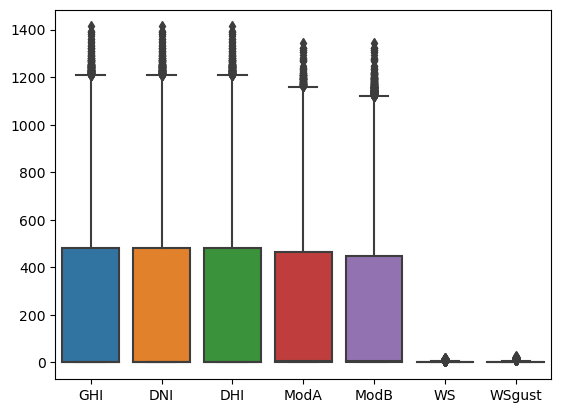

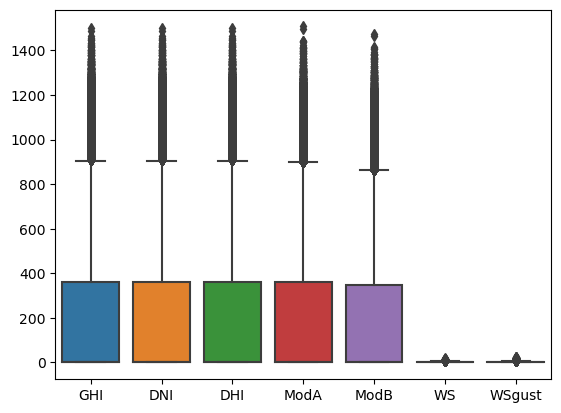

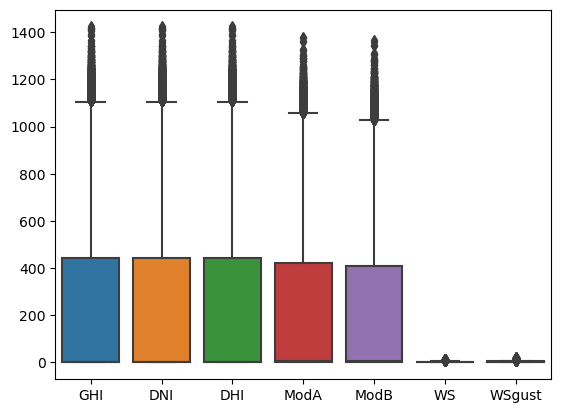

In [228]:
check_outliers(benin)
check_outliers(sierra)
check_outliers(togo)

In [216]:
check_negative_values(benin)
# check_negative_values(sierra)
# check_negative_values(togo)

All the three columns have negative values


### Cleaning the data

#### Handling negative values

In [108]:
# changing negative values to zero
def negative_to_zero(df):
    df['GHI'] = df['GHI'].apply(lambda x: max(x,0))
    df['DNI'] = df['GHI'].apply(lambda x: max(x,0))
    df['DHI'] = df['GHI'].apply(lambda x: max(x,0))

In [247]:
negative_to_zero(benin)
negative_to_zero(sierra)
negative_to_zero(togo)

In [218]:
# check if the negative value exist still
check_negative_values(benin)
check_negative_values(sierra)
check_negative_values(togo)

All the three columns don't have negative values
All the three columns don't have negative values
All the three columns don't have negative values


#### Handling outliers

In [148]:
# further check outliers
def histo_gram(df,col):
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    df_skewness = skew(df[col])
    print(f"Skewness: {df_skewness}")

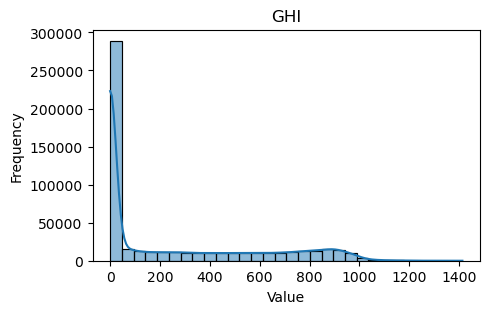

Skewness: 1.0322444951757568


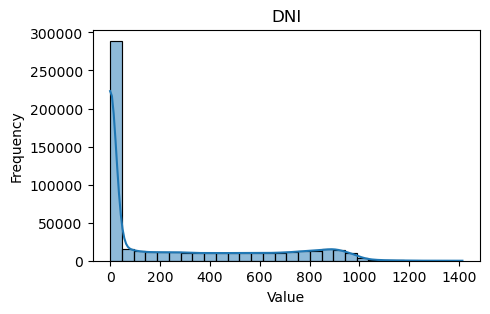

Skewness: 1.0322444951757568


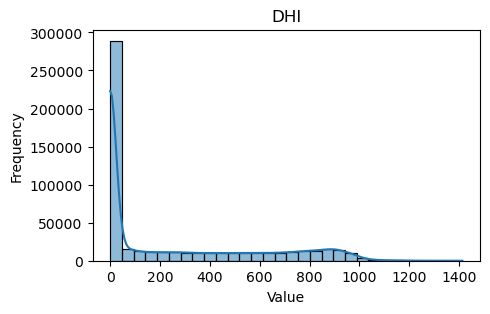

Skewness: 1.0322444951757568


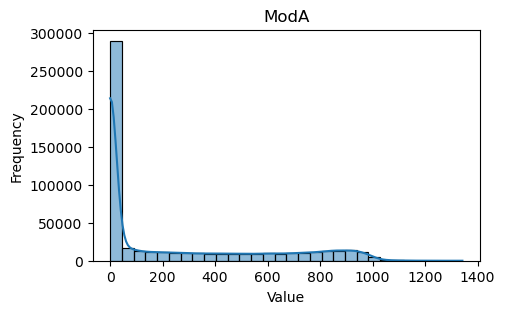

Skewness: 1.0674132213453302


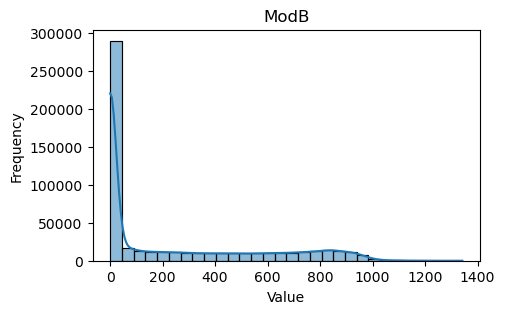

Skewness: 1.0760280681573258


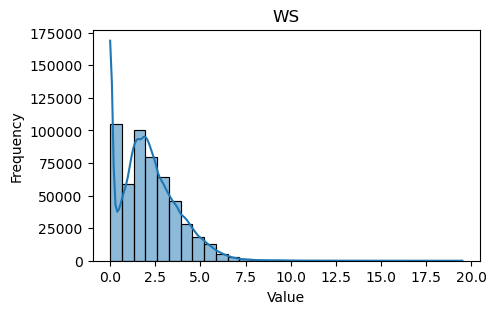

Skewness: 0.8684035505097764


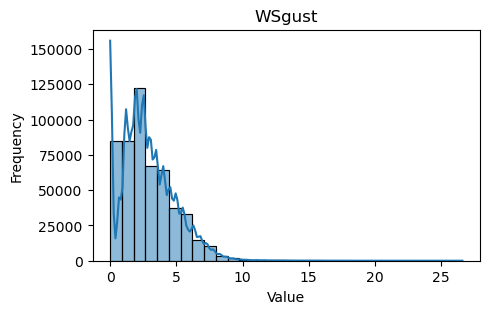

Skewness: 0.9289054916958506


In [221]:
outlier_col = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
for col in outlier_col:
    histo_gram(benin,col)
#     histo_gram(sierra,col)
#     histo_gram(togo,col)

In [242]:
def removing_outlier(df,col,upper_limit):
#     df_benin.loc[df_benin['GHI'] > upper_limit, 'GHI'] = df_benin['GHI'].median()
    df.loc[df[col] > upper_limit, col] = df[col].median()

In [248]:
outlier_col = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
for col in outlier_col:
    removing_outlier(benin,col,benin[col].quantile(0.95))
    removing_outlier(sierra,col,sierra[col].quantile(0.95))
    removing_outlier(togo,col,togo[col].quantile(0.95))

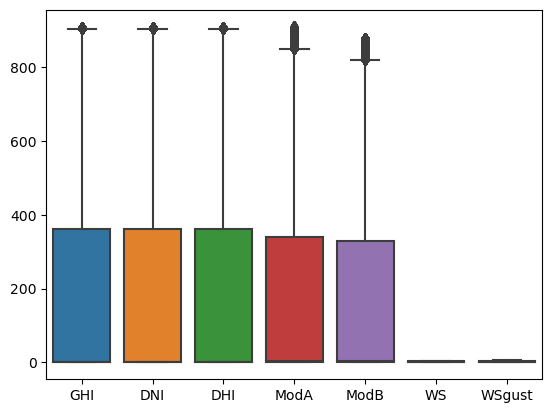

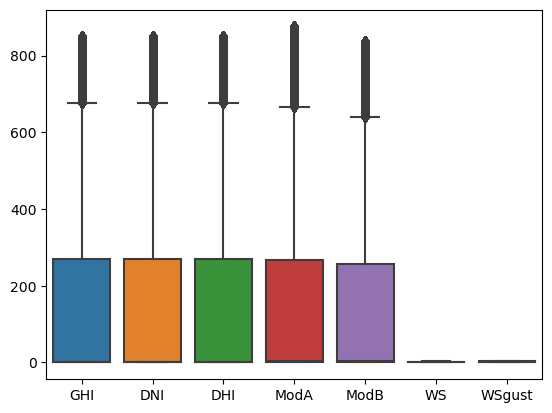

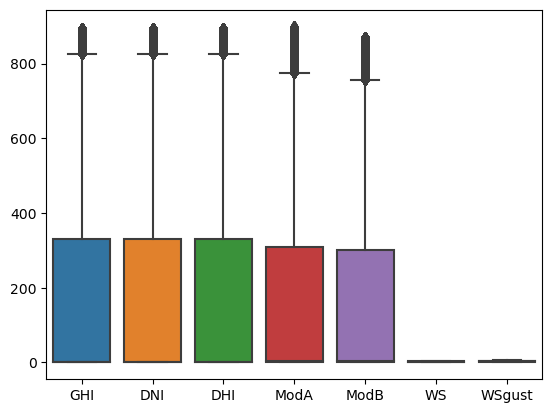

In [230]:
check_outliers(benin)
check_outliers(sierra)
check_outliers(togo)

## Task 3 Time series analysis

In [257]:
def month_hour(df):
    df['Month'] = pd.to_datetime(df['Timestamp'], errors='coerce') .dt.to_period('M')
    df['Hour'] = pd.to_datetime(df['Timestamp'], errors='coerce') .dt.hour
    
def plot_timeSeries(df):
    # call the above function to create Month and Hour column
    month_hour(df)
    monthly_data = df.groupby('Month').agg({'GHI': 'mean', 'DNI': 'mean', 'DHI': 'mean', 'Tamb': 'mean'}).reset_index()  
    hour_data = df.groupby('Hour').agg({'GHI': 'mean', 'DNI': 'mean', 'DHI': 'mean', 'Tamb': 'mean'}).reset_index()  
    
    fig, axes = plt.subplots(2, 4, figsize=(30,15))
    column = ['GHI','DNI','DHI','Tamb']
    colors = ['blue', 'orange', 'green', 'red']
    titles = ['GHI', 'DNI', 'DHI', 'Tamb']
    
    # monthly trend
    for i, col in enumerate(column):
        axes[0,i].plot(monthly_data['Month'].astype(str), monthly_data[col], label=col, color = colors[i])
        axes[0,i].set_title(f'Monthly {titles[i]} Trend')
        axes[0,i].set_ylabel(col)
        plt.xticks(rotation=90)
    
    # hourly trend
    for i, col in enumerate(column):
        axes[1,i].plot(hour_data['Hour'].astype(str), hour_data[col], label=col, color = colors[i])
        axes[1,i].set_title(f'Hourly {titles[i]} Trend')
        axes[1,i].set_ylabel(col)
        plt.xticks(rotation=90)    
        
    # print('\n')

In [250]:
plot_timeSeries(benin)
plot_timeSeries(sierra)
plot_timeSeries(togo)

### Evaluate the impact of Cleaning on ModA and ModB

In [ ]:
def impact_of_cleaning(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    cleaning_events = df[df['Cleaning'] == 1]['Timestamp']

    pre_cleaning_modA = []
    post_cleaning_modA = []
    pre_cleaning_modB = []
    post_cleaning_modB = []

    time_window = pd.Timedelta(days=1)
    
    for event in cleaning_events:
        # Filter data within the time window before and after the cleaning event
        pre_cleaning_data = df[(df['Timestamp'] >= event - time_window) & (df['Timestamp'] < event)]
        post_cleaning_data = df[(df['Timestamp'] > event) & (df['Timestamp'] <= event + time_window)]

        # Calculate the mean sensor readings before and after cleaning
        pre_cleaning_modA.append(pre_cleaning_data['ModA'].mean())
        post_cleaning_modA.append(post_cleaning_data['ModA'].mean())
        pre_cleaning_modB.append(pre_cleaning_data['ModB'].mean())
        post_cleaning_modB.append(post_cleaning_data['ModB'].mean())

    # Convert results to DataFrame for easier plotting
    impact_df = pd.DataFrame({
        'Cleaning_Event': cleaning_events,
        'Pre_Cleaning_ModA': pre_cleaning_modA,
        'Post_Cleaning_ModA': post_cleaning_modA,
        'Pre_Cleaning_ModB': pre_cleaning_modB,
        'Post_Cleaning_ModB': post_cleaning_modB
    })

    # Calculate the improvement or change
    impact_df['ModA_Change'] = impact_df['Post_Cleaning_ModA'] - impact_df['Pre_Cleaning_ModA']
    impact_df['ModB_Change'] = impact_df['Post_Cleaning_ModB'] - impact_df['Pre_Cleaning_ModB']

    # Visualize the impact
    plt.figure(figsize=(14, 7))

    # # Plot ModA
    plt.subplot(2, 1, 1)
    plt.plot(impact_df['Cleaning_Event'], impact_df['Post_Cleaning_ModA'], color='blue', label='Post-Cleaning ModA')
    plt.xlabel('Time')
    plt.ylabel('ModA Readings')
    plt.title('Impact of Cleaning on ModA')
    plt.legend()

    # Plot ModB
    plt.subplot(2, 1, 2)
    plt.plot(impact_df['Cleaning_Event'], impact_df['Post_Cleaning_ModB'], color='green', label='Post-Cleaning ModB')
    plt.xlabel('Time')
    plt.ylabel('ModB Readings')
    plt.title('Impact of Cleaning on ModB')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
impact_of_cleaning(benin)
impact_of_cleaning(sierra)
impact_of_cleaning(togo)

## Task 4  Correlation Analysis

In [ ]:
def correlation_heatmap(df,columns,task,region):
    display(HTML(f'<span style="font-size: 20px;">{region}</span>'))
    correlation_matrix = df[columns].corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(task)
    plt.show()

In [ ]:
# The correlation between solar radiation components and temperature fluctuations
columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
between = "Correlation between solar radiation components and temperature fluctuations"
correlation_heatmap(benin,columns,between,"Benin-Malaville")
correlation_heatmap(sierra,columns,between,"Sierralone-Bumbuna")
correlation_heatmap(togo,columns,between,"Togo-Dapaong")

### Relation between wind conditions and solar irradiance

In [ ]:
# The relationship between wind conditions and solar radiance
columns = ['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']
between = "Relationship between wind conditions and solar radiance"
correlation_heatmap(benin,columns,between,"Benin-Malaville")
correlation_heatmap(sierra,columns,between,"Sierralone-Bumbuna")
correlation_heatmap(togo,columns,between,"Togo-Dapaong")